In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np, crocoddyl, random; crocoddyl.switchToNumpyArray()
%matplotlib inline
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
%matplotlib inline

In [2]:
starting_configurations, linear_velocity, angular_velocity, value_func = [], [], [], []    
iters = []

for _ in range(10000):
    initial_config = [random.uniform(-2.1, 2.1), random.uniform(-2.1, 2.1), 0]            
    model = crocoddyl.ActionModelUnicycle()

    model.costWeights = np.matrix([1, 0.3]).T

    problem = crocoddyl.ShootingProblem(np.matrix(initial_config).T, [ model ] * 20, model)
    ddp = crocoddyl.SolverDDP(problem)
    ddp.solve([], [], 100)
    ddp.xs[0]
    starting_configurations.append(ddp.xs[0])
    linear_velocity.append(ddp.us[0][0])
    angular_velocity.append(ddp.us[0][0])
    value_func.append(sum(d.cost for d in ddp.datas()))
    iters.append(ddp.iter)

starting_configurations = np.squeeze(np.array(starting_configurations))
x = starting_configurations[0:,0]
y = starting_configurations[0:,1]
#z = value_func
#z = angular_velocity
z = linear_velocity





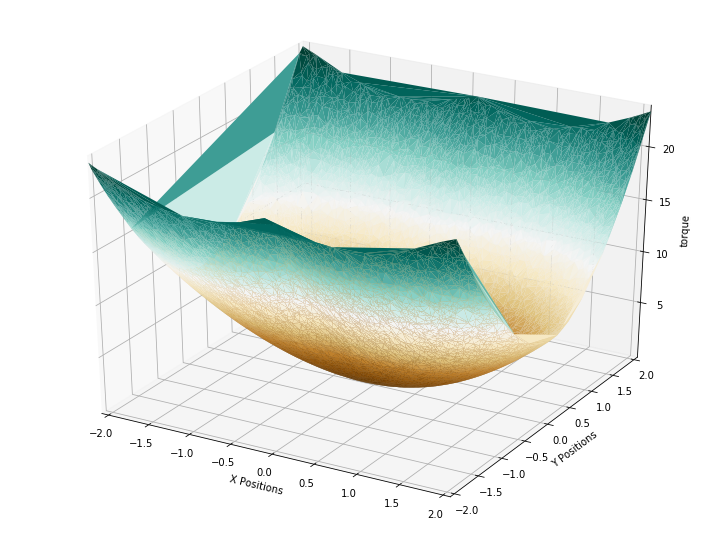

In [62]:
plt.rcParams["figure.figsize"] = 12.8, 9.6
crocoddyl.switchToNumpyArray()
cmap = plt.get_cmap('jet')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X Positions")
ax.set_ylabel("Y Positions")
ax.set_zlabel("torque")
ax.set_xlim([-2., 2.])
ax.set_ylim([-2., 2])
#ax.scatter3D(x, y, z )
ax.plot_trisurf(x, y, z, cmap='BrBG', linewidth= 1)
#ax.view_init(elev=40., azim=-5)
#ax.scatter(x.flat, y.flat, z.flat)

plt.show()


(-3, 3)

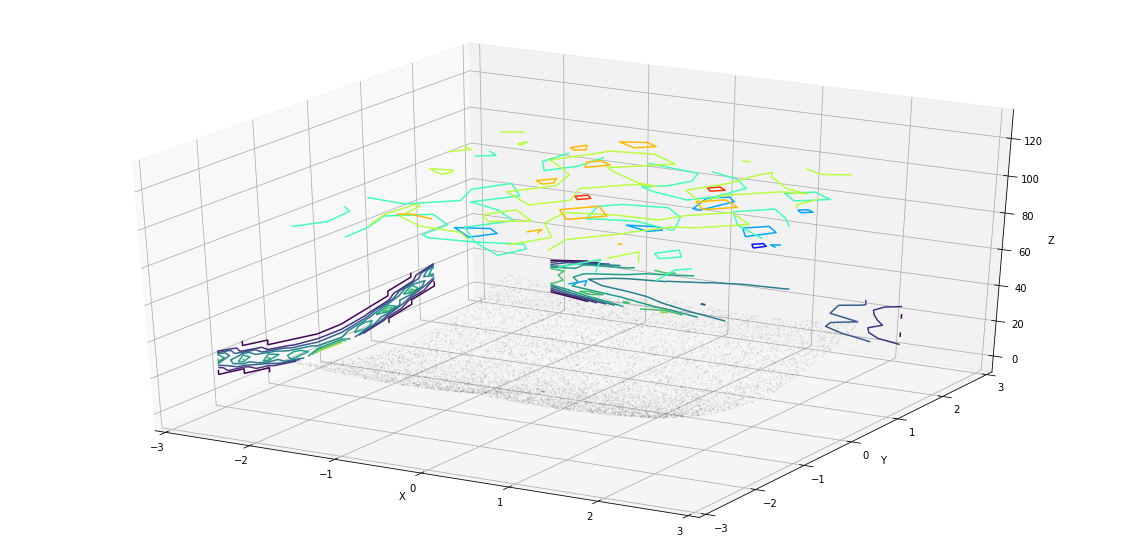

In [55]:
# Create figure, add subplot with 3d projection
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
#ax.set_zlim(vmin, vmax)
Y = np.array(Y).reshape(10000, )
X = np.array(X).reshape(10000, )
Z = np.array(Z).reshape(10000, )
# Plot the data cloud
ax.scatter(X, Y, Z, s=.5, alpha=.05, color='k')

hist, binx, biny = np.histogram2d( X, Y)
x = np.linspace(X.min(), X.max(), hist.shape[0])
y = np.linspace(Y.min(), Y.max(), hist.shape[1])
x, y = np.meshgrid(x, y)
ax.contour(x, y, hist, zdir='z',cmap='jet')


hist, binx, biny = np.histogram2d( X, Z)
x = np.linspace(X.min(), X.max(), hist.shape[0])
z = np.linspace(Z.min(), Z.max(), hist.shape[1])
x, z = np.meshgrid(x, z)
ax.contour(x, hist, z, zdir='y', offset=3)

hist, binx, biny = np.histogram2d( Y, Z)
y = np.linspace(Y.min(), Y.max(), hist.shape[0])
z = np.linspace(Z.min(), Z.max(), hist.shape[1])
z, y = np.meshgrid(z, y)
ax.contour(hist, y, z, zdir='x', offset=-3)

ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
#ax.set_zlim([-3, 3])

In [82]:
xx, yy =np.meshgrid(x, y)

In [84]:
xx

array([[ 0.99531567, -1.84945678,  1.55173126, ..., -0.62709678,
         0.47652895, -0.05415413],
       [ 0.99531567, -1.84945678,  1.55173126, ..., -0.62709678,
         0.47652895, -0.05415413],
       [ 0.99531567, -1.84945678,  1.55173126, ..., -0.62709678,
         0.47652895, -0.05415413],
       ...,
       [ 0.99531567, -1.84945678,  1.55173126, ..., -0.62709678,
         0.47652895, -0.05415413],
       [ 0.99531567, -1.84945678,  1.55173126, ..., -0.62709678,
         0.47652895, -0.05415413],
       [ 0.99531567, -1.84945678,  1.55173126, ..., -0.62709678,
         0.47652895, -0.05415413]])

In [92]:
contour = plt.contourf(xx, yy, np.array(z))

TypeError: 'numpy.flatiter' object is not callable

In [96]:
a = list(zip(x, y, z))

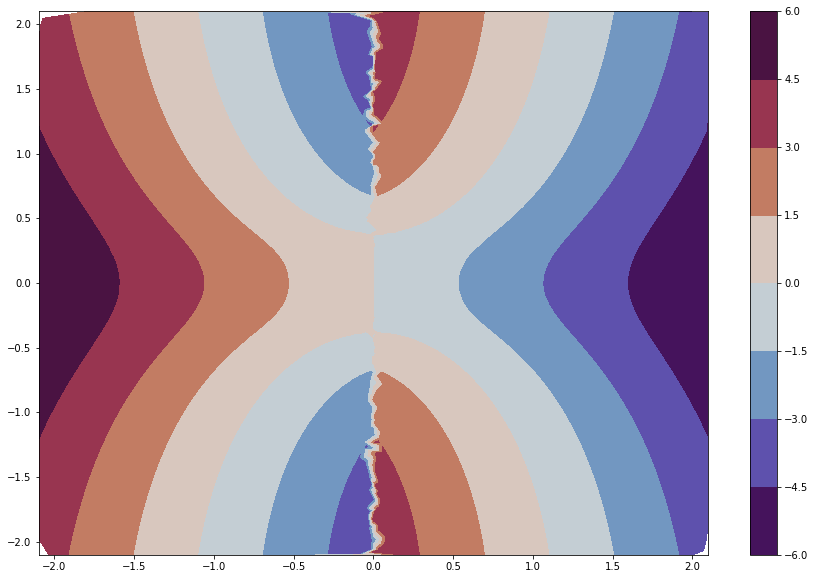

In [111]:
plt.figure(figsize=(15, 10))
plt.tricontourf(x,y,z, cmap = 'twilight_shifted')
plt.colorbar()